In [2]:
using DifferentialEquations
using Plots

In [1]:
s = 17.6  # начальное расстояние
phi = 1.23   # угол движения лодки

1.23

In [3]:
dr(r, p, theta) = r / sqrt(41/10)  # функция в дифференциальном уравнении.


dr (generic function with 1 method)

In [115]:
# начальные условия

# расстояние от лодки до катера при начале спирального движения
k = s
x1 = 10k/61
x2 = 10k/41

r0 = x1
theta0 = 0

r1 = x2
theta1 = -pi

theta_span0 = (theta0, theta0 + 2*pi)
theta_span1 = (theta1 + 2*pi, theta1)


(3.141592653589793, -3.141592653589793)

In [116]:
prob1 = ODEProblem(dr, r0, theta_span0)
sol1 = solve(prob1, Tsit5(), reltol=1e-8, abstol=1e-8)
sol1.u[1]

2.8852459016393444

In [117]:
prob2 = ODEProblem(dr, r1, theta_span1)
sol2 = solve(prob2, Tsit5(), reltol=1e-8, abstol=1e-8)
sol2.u[1]

4.2926829268292686

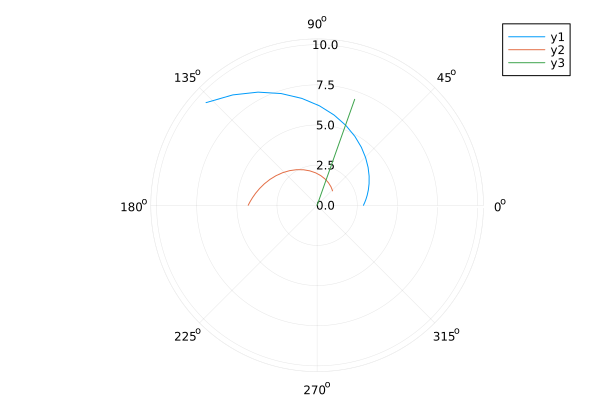

In [121]:
using Plots
gr()


plot(sol1.t[1:20], sol1.u[1:20], proj = :polar)
plot!(sol2.t[1:20], sol2.u[1:20], proj = :polar)
plot!([phi, phi+0.000001], [0, 7])

In [119]:
min_err_1 = 2*pi + 0.01
min_idx_1 = -1
idx = 0
for v in sol1.t
    idx = idx + 1
    if min_err_1 > abs(v - phi)
        min_err_1 = abs(v-phi)
        min_idx_1 = idx
    end
end
sol1.t[min_idx_1], sol1.u[min_idx_1]

(1.2246941920355319, 5.282732490771007)

In [120]:
min_err_2 = 2*pi + 0.01
min_idx_2 = -1
idx = 0
for v in sol2.t
    idx = idx + 1
    if min_err_2 > abs(v - phi)
        min_err_2 = abs(v-phi)
        min_idx_2 = idx
    end
end
sol2.t[min_idx_2], sol2.u[min_idx_2]

(1.2765407944380813, 1.7088633948923861)